<a href="https://colab.research.google.com/github/BriouaNorElHouda/py/blob/main/landv3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import zipfile
import requests
import os
import io
import cv2
import shutil
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,Conv2D ,GlobalAveragePooling2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.losses import CategoricalCrossentropy
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import time

In [4]:
labels = {
    'AnnualCrop': 0,
    'Forest': 1,
    'HerbaceousVegetation': 2,
    'Highway': 3,
    'Industrial': 4,
    'Pasture': 5,
    'PermanentCrop': 6,
    'Residential': 7,
    'River': 8,
    'SeaLake': 9,
}

In [5]:
zip_path = '/content/drive/MyDrive/Colab Notebooks/EuroSatDS.zip'

extracted_path = "/content/EuroSatDS"
with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(extracted_path)

data = []

src_path = os.path.join(extracted_path, "EuroSatDS")
subclass = sorted(os.listdir(src_path))

def create_data():
    for sclass in subclass:
        path = os.path.join(src_path, sclass)
        class_num = subclass.index(sclass)
        for img in tqdm(os.listdir(path)):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
            new_array = cv2.resize(img_array, (64, 64))
            data.append([new_array, class_num])

create_data()

print("Total samples in the dataset:", len(data))

100%|██████████| 2500/2500 [00:00<00:00, 6438.83it/s]

Total samples in the dataset: 22000


In [6]:

X = []
y = []

for features, label in data:
    X.append(features)
    y.append(label)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class MyDataGenerator(keras.utils.Sequence):
    def __init__(self, X, y, batch_size):
        self.X = X
        self.y = y
        self.batch_size = batch_size
        self.num_samples = len(X)

    def __len__(self):
        return int(np.ceil(self.num_samples / self.batch_size))

    def __getitem__(self, index):
        start = index * self.batch_size
        end = min((index + 1) * self.batch_size, self.num_samples)

        batch_X = self.X[start:end]
        batch_y = self.y[start:end]

        batch_X = np.array(batch_X).reshape(-1,64, 64, 3) / 255.0
        batch_y = np.array(batch_y)

        return batch_X, batch_y

batch_size = 32
train_generator = MyDataGenerator(X_train, y_train, batch_size)
test_generator = MyDataGenerator(X_test, y_test, batch_size)


In [ ]:
NAME="M3042"

model=Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),  activation='relu',  input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

tensorboard= TensorBoard(log_dir="logs\{}".format(NAME))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])


history = model.fit(train_generator, epochs=50,batch_size=32, validation_data=test_generator,callbacks=[tensorboard])

Epoch 1/50
550/550 [==============================] - 142s 255ms/step - loss: 1.5646 - accuracy: 0.3666 - val_loss: 1.2278 - val_accuracy: 0.5143
Epoch 2/50
550/550 [==============================] - 136s 247ms/step - loss: 1.1792 - accuracy: 0.5426 - val_loss: 0.9842 - val_accuracy: 0.6445
Epoch 3/50
550/550 [==============================] - 135s 245ms/step - loss: 0.9518 - accuracy: 0.6546 - val_loss: 0.8141 - val_accuracy: 0.7155
Epoch 4/50
550/550 [==============================] - 137s 250ms/step - loss: 0.8344 - accuracy: 0.6986 - val_loss: 0.7644 - val_accuracy: 0.7150
Epoch 5/50
550/550 [==============================] - 136s 247ms/step - loss: 0.7836 - accuracy: 0.7166 - val_loss: 0.7250 - val_accuracy: 0.7300
Epoch 6/50
550/550 [==============================] - 139s 253ms/step - loss: 0.7514 - accuracy: 0.7210 - val_loss: 0.7792 - val_accuracy: 0.7077
Epoch 7/50
550/550 [==============================] - 139s 252ms/step - loss: 0.7187 - accuracy: 0.7360 - val_loss: 0.6501 -

In [ ]:
NAME="M15"

# Model architecture

M15 = Sequential()

M15.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
M15.add(BatchNormalization())
M15.add(MaxPooling2D(pool_size=(2, 2)))

M15.add(Conv2D(64, (3, 3), activation='relu'))
M15.add(BatchNormalization())
M15.add(MaxPooling2D(pool_size=(2, 2)))

M15.add(Conv2D(128, (3, 3), activation='relu'))
M15.add(BatchNormalization())
M15.add(MaxPooling2D(pool_size=(2, 2)))

M15.add(Conv2D(256, (3, 3), activation='relu'))
M15.add(BatchNormalization())
M15.add(GlobalAveragePooling2D())

M15.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
M15.add(Dropout(0.4))
M15.add(Dense(10, activation='softmax'))

tensorboard= TensorBoard(log_dir="logs\{}".format(NAME))

M15.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])


history = M15.fit(train_generator, epochs=50,batch_size=32, validation_data=test_generator,callbacks=[tensorboard])

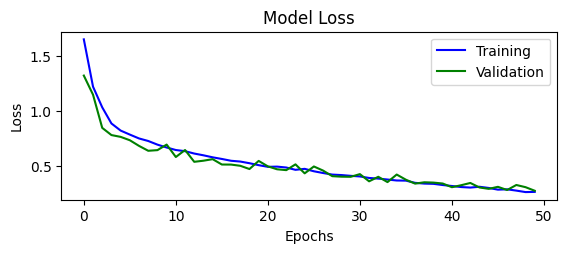

In [10]:
#Plot Model Loss
plt.subplot(211)
plt.title('Model Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='green', label='test')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training','Validation'],loc='upper right')

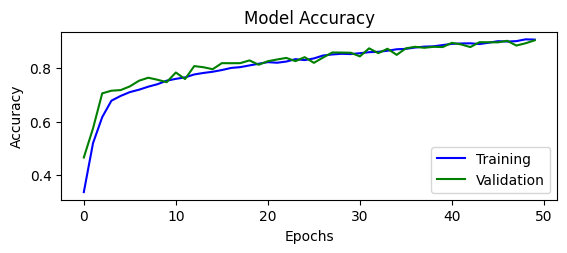

In [11]:
# Plot Accuracy
plt.subplot(211)
plt.title('Model Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='green', label='test')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training','Validation'],loc='lower right')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [1]:
save_path = '/content/drive/MyDrive/Colab Notebooks/MyModels/landv3042.h5'
model.save(save_path)


NameError: name 'model' is not defined

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

NameError: name 'plot_model' is not defined

In [13]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 6, 6, 128)        

In [20]:
#Testing predictions on model
from tensorflow.keras.preprocessing import image

labels = ["AnnualCrop", "Forest", "HerbaceousVegetation", "Highway", "Industrial", "Pasture", "PermanentCrop", "Residential", "River", "SeaLake"]


def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(64,64,3))
    img_array = image.img_to_array(img)
    img_array = img_array/ 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

path = "/content/EuroSatDS/EuroSatDS/River/River_2089.jpg"
img = preprocess_image(path)


predictions = model.predict(img)
predicted_class_index = np.argmax(predictions)

print(predictions)
predicted_class = labels[predicted_class_index]

print("Predicted class:", predicted_class)


1/1 [==============================] - 0s 27ms/step
[[4.0609911e-01 4.2301454e-02 5.1506019e-01 4.3801516e-03 2.2941354e-06
  1.0416167e-03 2.6209345e-02 4.3170799e-06 1.3779118e-05 4.8877080e-03]]
Predicted class: HerbaceousVegetation


In [ ]:
import numpy as np

# Convert the given matrix to a NumPy array
prediction_matrix = np.array([4.0609911e-01, 4.2301454e-02, 5.1506019e-01, 4.3801516e-03,
                              2.2941354e-06, 1.0416167e-03, 2.6209345e-02, 4.3170799e-06,
                              1.3779118e-05, 4.8877080e-03])

# Find the maximum value in the array
max_value = np.max(prediction_matrix)
print("Maximum value:", max_value)

# Find the index of the maximum value
max_index = np.argmax(prediction_matrix)
print("Index of maximum value:", max_index)


138/138 [==============================] - 0s 3ms/step


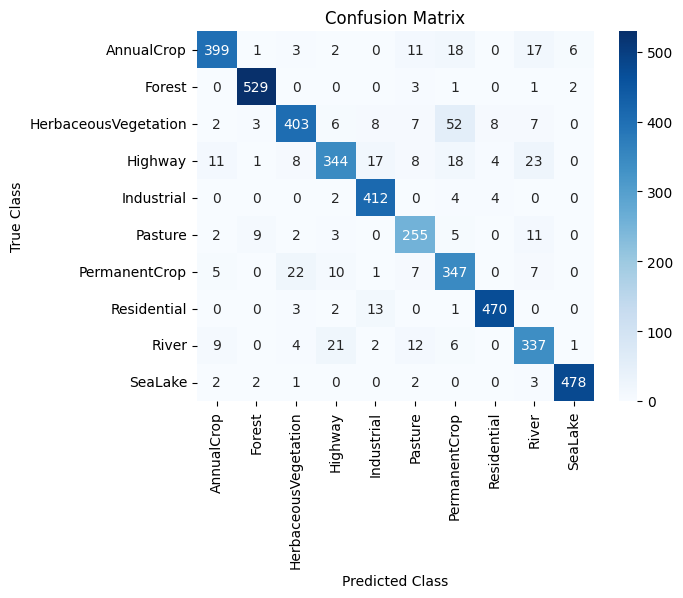

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()

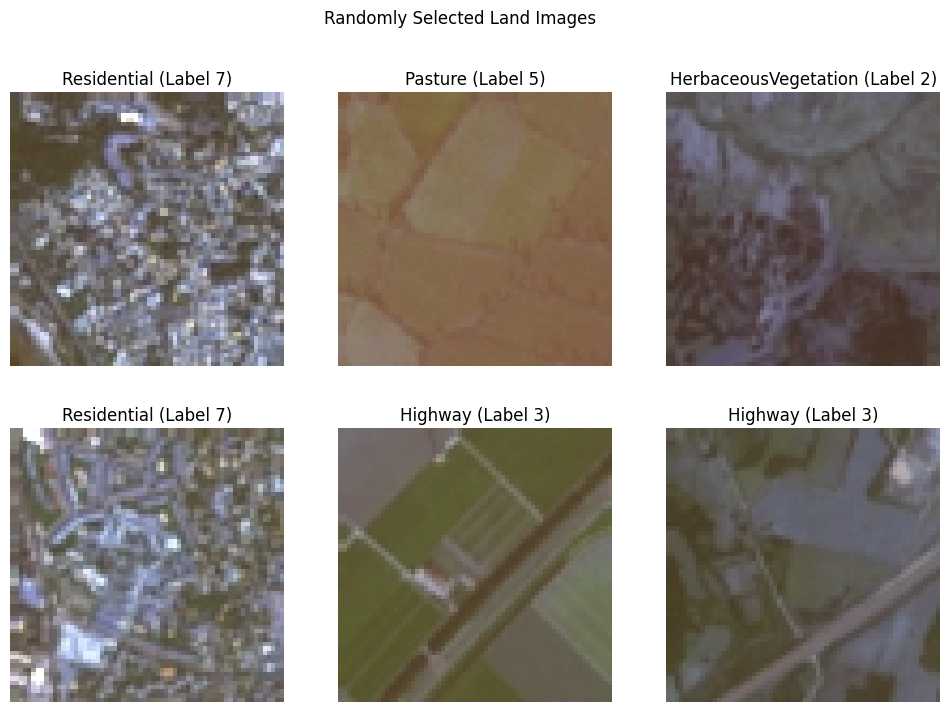

In [ ]:
import random
types = {'AnnualCrop': 0,
         'Forest': 1,
          'HerbaceousVegetation': 2,
          'Highway': 3,
          'Industrial': 4,
          'Pasture': 5,
          'PermanentCrop': 6,
          'Residential': 7,
          'River': 8,
          'SeaLake': 9,
          }

image_files = []
for root, dirs, files in os.walk(src_path):
    for file in files:
        if file.endswith(".jpg"):
            image_files.append((os.path.join(root, file), os.path.basename(root)))

random_images = random.sample(image_files, 6)
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle('Randomly Selected Land Images')

for i, (image_file, land_name) in enumerate(random_images):
    img_array = cv2.imread(image_file, cv2.IMREAD_COLOR)
    new_array = cv2.resize(img_array, (64, 64))

    row_index = i // 3
    col_index = i % 3

    label_number = types[land_name]
    axes[row_index, col_index].imshow(new_array,  cmap=None)
    axes[row_index, col_index].set_title(f'{land_name} (Label {label_number})')
    axes[row_index, col_index].axis('off')

plt.show()